<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Research-Question:" data-toc-modified-id="Research-Question:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Research Question:</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Importing-used-libraries" data-toc-modified-id="Importing-used-libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing used libraries</a></span></li><li><span><a href="#Applying-global-settings" data-toc-modified-id="Applying-global-settings-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Applying global settings</a></span></li><li><span><a href="#Summary-of-the-Dataset" data-toc-modified-id="Summary-of-the-Dataset-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Summary of the Dataset</a></span></li><li><span><a href="#Importing-data" data-toc-modified-id="Importing-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Importing data</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Visualizing-the-numerical-columns" data-toc-modified-id="Visualizing-the-numerical-columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualizing the numerical columns</a></span></li><li><span><a href="#Visualizing-Categorical-Data" data-toc-modified-id="Visualizing-Categorical-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualizing Categorical Data</a></span></li></ul></li><li><span><a href="#Encoding" data-toc-modified-id="Encoding-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Encoding</a></span></li><li><span><a href="#Creating-Correlation-Matrix" data-toc-modified-id="Creating-Correlation-Matrix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Creating Correlation Matrix</a></span><ul class="toc-item"><li><span><a href="#Filtering-the-correlation-matrix" data-toc-modified-id="Filtering-the-correlation-matrix-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Filtering the correlation matrix</a></span></li><li><span><a href="#Important-columns" data-toc-modified-id="Important-columns-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Important columns</a></span></li></ul></li><li><span><a href="#Normalize-the-data-to-a-uniform-scale" data-toc-modified-id="Normalize-the-data-to-a-uniform-scale-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Normalize the data to a uniform scale</a></span></li><li><span><a href="#Splitting-the-data" data-toc-modified-id="Splitting-the-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Splitting the data</a></span></li><li><span><a href="#Predicting-the-price" data-toc-modified-id="Predicting-the-price-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Predicting the price</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Nonlinear-Regression" data-toc-modified-id="Nonlinear-Regression-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Nonlinear Regression</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Assignment 4

By: Firas Al Wadhahi

ID: 101755



## Research Question:



<div class="alert alert-block alert-info">


    
<b> Can we predict the car price given some features of a car? </b> 

   
</div>


## Exploratory Data Analysis

In the following section, I am going to explore the dataset and analyze it to be able to find answer to the research question


### Importing used libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Applying global settings

In [2]:
# Setting max column width to None to avoid truncated values in displaying a dataframe
# and allows the user to see the entire cell content without truncating it
pd.set_option('display.max_colwidth', None)


# Setting global figure size that will be used in the figures generated in this notebook
plt.rcParams["figure.figsize"] = (20,8)

### Summary of the Dataset


* **Data Source:** Used-car-catalog (filename: cars.csv)
* **Location:** https://www.kaggle.com/lepchenkov/usedcarscatalog/version/1


The dataset used in this notebook is (used-car-catalog) dataset which is scraped in Belarus (western Europe) on the 2nd of December 2019

This dataset contains +38K car prices along with 30 features (both numerical and categorical).



> Note:
>
> If you would like to run this notebook locally, Please make sure the data files are in your **working directory** folder.

### Importing data

In [3]:
# Reading the movies csv file into movies dataframe 
cars_df = pd.read_csv('cars.csv')


# Displaying the dataframe
cars_df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [4]:
cars_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
odometer_value,38531.0,248864.638447,136072.376530,0.0,158000.0,250000.0,325000.0,1000000.0
year_produced,38531.0,2002.943734,8.065731,1942.0,1998.0,2003.0,2009.0,2019.0
engine_capacity,38521.0,2.055161,0.671178,0.2,1.6,2.0,2.3,8.0
price_usd,38531.0,6639.971021,6428.152018,1.0,2100.0,4800.0,8990.0,50000.0
number_of_photos,38531.0,9.649062,6.093217,1.0,5.0,8.0,12.0,86.0
up_counter,38531.0,16.306091,43.286933,1.0,2.0,5.0,16.0,1861.0
duration_listed,38531.0,80.577249,112.826569,0.0,23.0,59.0,91.0,2232.0


In [5]:
cars_df.isnull().sum()


manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

There are only 10 empty values for "Engine Capacity".

Knowing that the total number of records in the dataset is +38K, it is safe to drop the 10 records without affecting the final results.




In [6]:
cars_df.dropna(inplace=True)
cars_df.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

## Exploratory Data Analysis


### Visualizing the numerical columns

In [7]:
# Calculate the age of the car

cars_df['age'] = 2021 - cars_df['year_produced']

# Dropping year produced, since we will use age instead
cars_df = cars_df.drop(columns=['year_produced'])

cars_df

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,age
0,Subaru,Outback,automatic,silver,190000,gasoline,False,gasoline,2.5,universal,...,True,True,False,True,False,True,True,True,16,11
1,Subaru,Outback,automatic,blue,290000,gasoline,False,gasoline,3.0,universal,...,False,False,True,True,False,False,False,True,83,19
2,Subaru,Forester,automatic,red,402000,gasoline,False,gasoline,2.5,suv,...,False,False,False,False,False,False,True,True,151,20
3,Subaru,Impreza,mechanical,blue,10000,gasoline,False,gasoline,3.0,sedan,...,False,False,False,False,False,False,False,False,86,22
4,Subaru,Legacy,automatic,black,280000,gasoline,False,gasoline,2.5,universal,...,False,True,True,False,False,False,False,True,7,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,gasoline,False,gasoline,3.5,sedan,...,False,False,True,True,False,False,True,True,301,21
38527,Chrysler,PT Cruiser,mechanical,blue,321000,diesel,False,diesel,2.2,hatchback,...,False,False,True,True,False,False,True,True,317,17
38528,Chrysler,300,automatic,blue,777957,gasoline,False,gasoline,3.5,sedan,...,False,False,True,True,False,False,True,True,369,21
38529,Chrysler,PT Cruiser,mechanical,black,20000,gasoline,False,gasoline,2.0,minivan,...,False,False,False,False,False,False,False,True,490,20


### Visualizing Categorical Data

[Text(0.5, 0, 'Car company'), Text(0, 0.5, 'Frequency of company')]

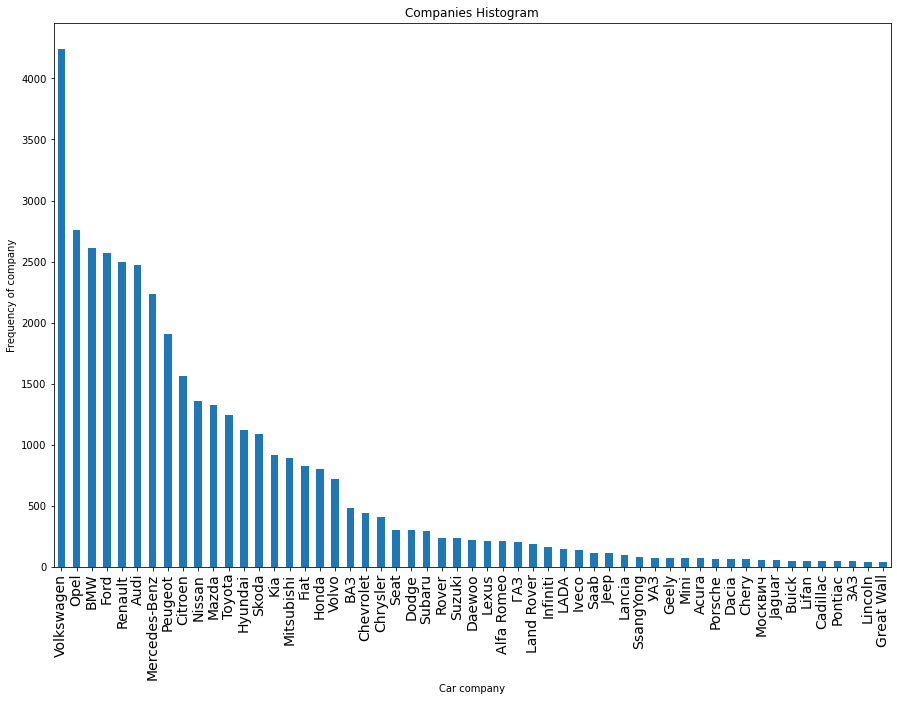

In [8]:
plt.figure(figsize=(15, 10))
plt1 = cars_df.manufacturer_name.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt.xticks(fontsize=14, rotation=90)
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

**Observation**

- `Volkswagen` is the most car listed in the dataset

[Text(0.5, 0, 'Body Type'), Text(0, 0.5, 'Frequency of Body Type')]

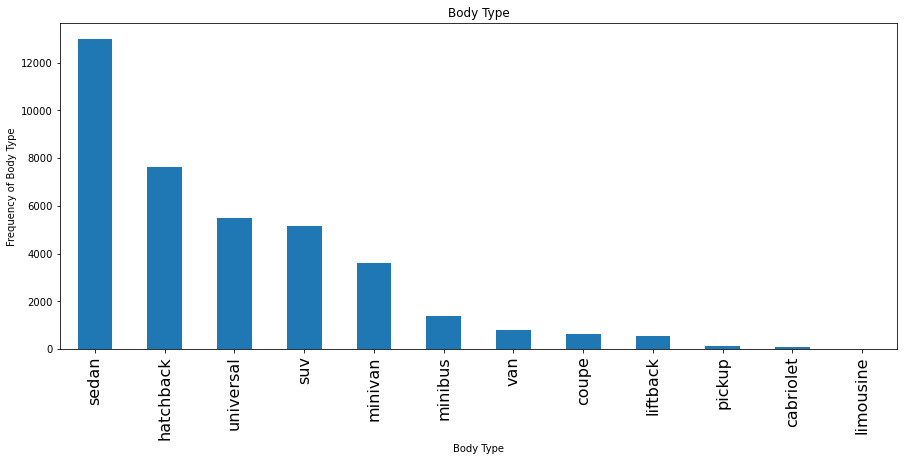

In [9]:
plt.figure(figsize=(15, 6))
plt1 = cars_df.body_type.value_counts().plot(kind='bar')
plt.title('Body Type')
plt.xticks(fontsize=16, rotation=90)
plt1.set(xlabel = 'Body Type', ylabel='Frequency of Body Type')

**Observation**

- `Sedan` is the most body type listed in the dataset

[Text(0.5, 0, 'Engine Type'), Text(0, 0.5, 'Frequency of Engine type')]

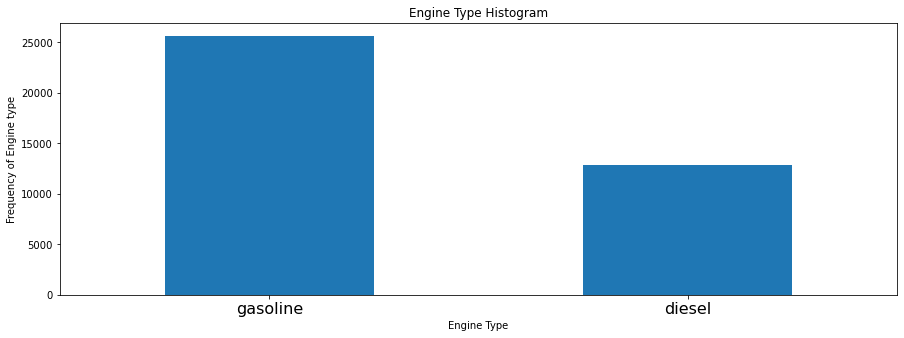

In [10]:
plt.figure(figsize=(15, 5))
plt1 = cars_df.engine_type.value_counts().plot(kind='bar')
plt.title('Engine Type Histogram')
plt.xticks(fontsize=16, rotation=0)
plt1.set(xlabel = 'Engine Type', ylabel='Frequency of Engine type')

**Observation**

- `gasoline` engine type is the most listed engine type in the dataset

<Figure size 3600x720 with 0 Axes>

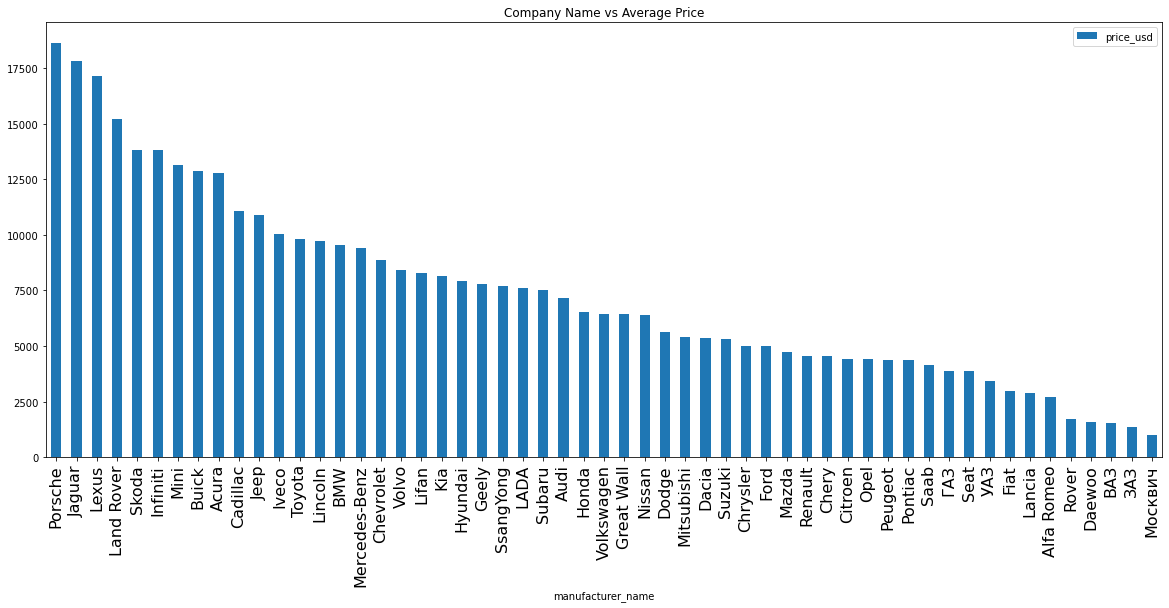

In [11]:
plt.figure(figsize=(50, 10))

avg_manufacture_price_df = pd.DataFrame(cars_df.groupby(['manufacturer_name'])['price_usd'].mean().sort_values(ascending = False))
avg_manufacture_price_df.plot.bar()
plt.title('Company Name vs Average Price')
plt.xticks(fontsize=16, rotation=90)
plt.show()

**Observation**

`Porsche`, `Jaguar`, and `Lexus` seems to have the highest average price.


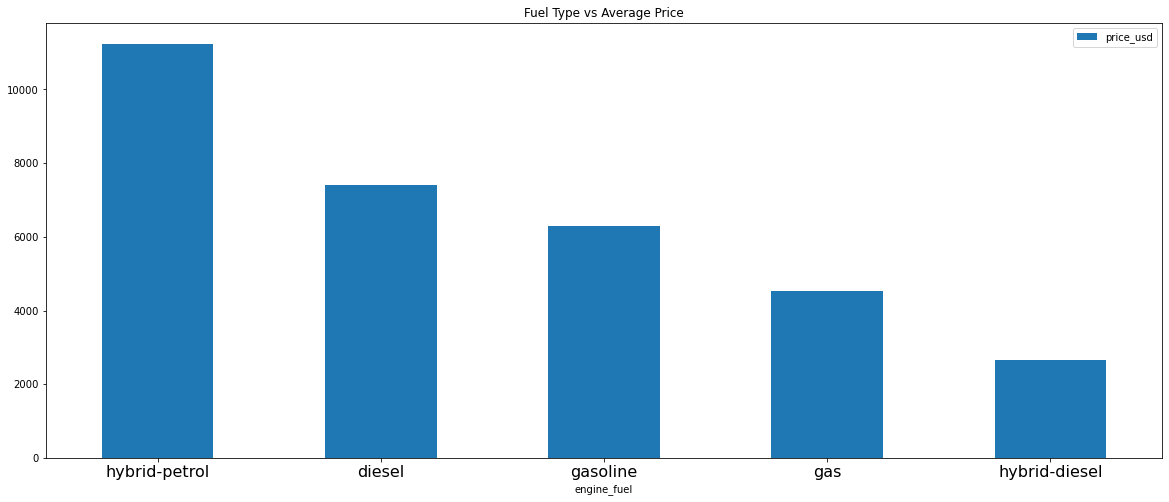

In [12]:
avg_engine_fuel_price_df = pd.DataFrame(cars_df.groupby(['engine_fuel'])['price_usd'].mean().sort_values(ascending = False))
avg_engine_fuel_price_df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.xticks(fontsize=16, rotation=0)
plt.show()

**Observation**

`hybrid-petrol` vehicles have the highest average price

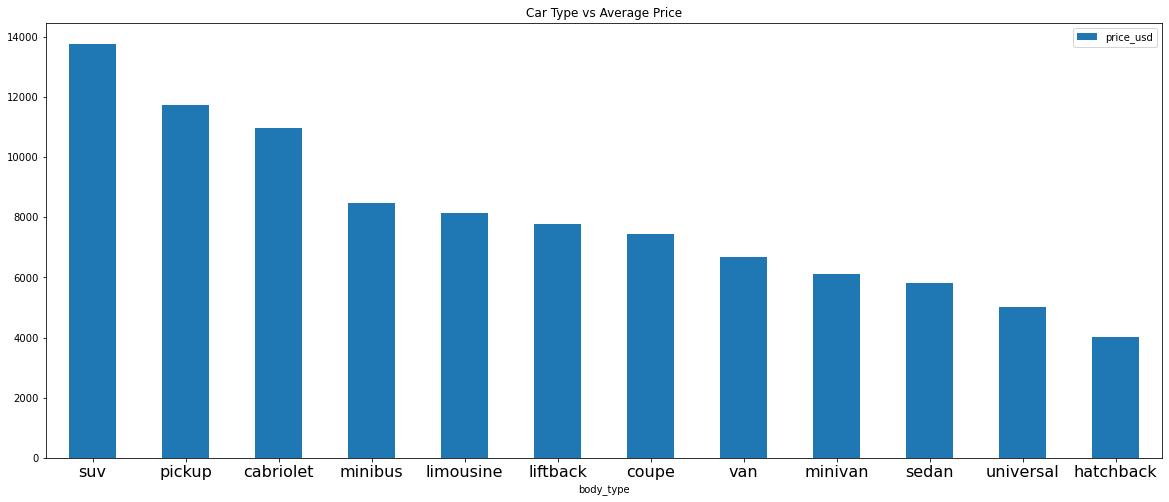

In [13]:
avg_body_type_price_df = pd.DataFrame(cars_df.groupby(['body_type'])['price_usd'].mean().sort_values(ascending = False))
avg_body_type_price_df.plot.bar()
plt.title('Car Type vs Average Price')
plt.xticks(fontsize=16, rotation=0)
plt.show()

**Observation**

`SUV` body type has the highest average price

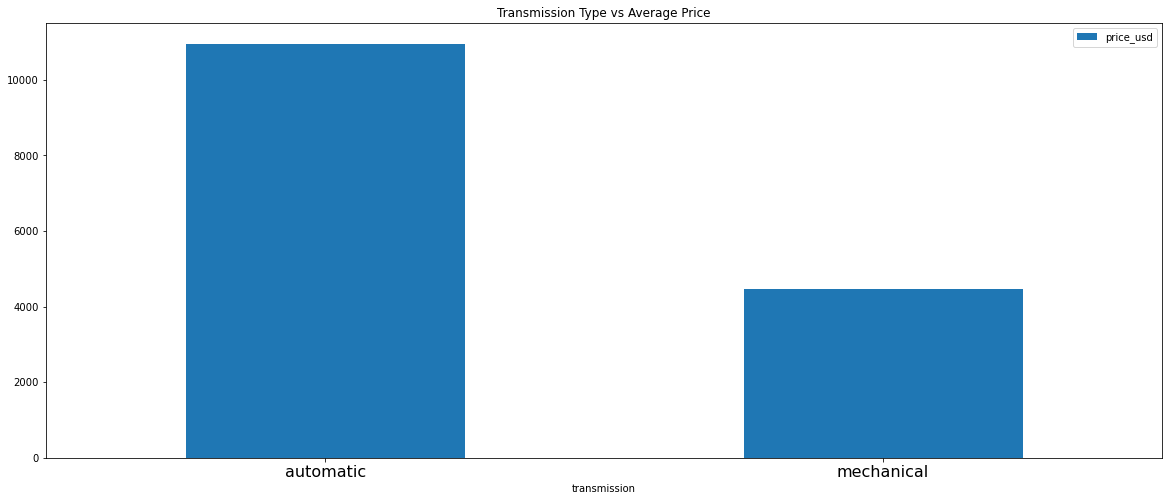

In [14]:
avg_transmission_price_df = pd.DataFrame(cars_df.groupby(['transmission'])['price_usd'].mean().sort_values(ascending = False))
avg_transmission_price_df.plot.bar()
plt.title('Transmission Type vs Average Price')
plt.xticks(fontsize=16, rotation=0)
plt.show()

## Encoding 

Machine learning models require all input and output variables to be numeric.

This means that if the dataset contains categorical data, then it must be encoded to numbers before fitting and evaluating the model.

[Reference](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)

Therefore, the following section converts the categorical columns into numeric by encoding the values with the help of the `LabelEncoder()` method from SKLearn.

In [15]:
categortical_columns = [i for i in cars_df.columns if cars_df[i].dtype=="object" or cars_df[i].dtype=="bool" ]


for cat_col in categortical_columns:
    lbl_enc = LabelEncoder()
    cars_df[cat_col] = lbl_enc.fit_transform(cars_df[cat_col])


cars_df

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,age
0,45,763,0,8,190000,2,0,1,2.5,10,...,1,1,0,1,0,1,1,1,16,11
1,45,763,0,1,290000,2,0,1,3.0,10,...,0,0,1,1,0,0,0,1,83,19
2,45,519,0,7,402000,2,0,1,2.5,9,...,0,0,0,0,0,0,1,1,151,20
3,45,609,1,1,10000,2,0,1,3.0,8,...,0,0,0,0,0,0,0,0,86,22
4,45,664,0,0,280000,2,0,1,2.5,10,...,0,1,1,0,0,0,0,1,7,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,8,86,0,8,290000,2,0,1,3.5,8,...,0,0,1,1,0,0,1,1,301,21
38527,8,765,1,1,321000,0,0,0,2.2,2,...,0,0,1,1,0,0,1,1,317,17
38528,8,86,0,1,777957,2,0,1,3.5,8,...,0,0,1,1,0,0,1,1,369,21
38529,8,765,1,0,20000,2,0,1,2.0,6,...,0,0,0,0,0,0,0,1,490,20


## Creating Correlation Matrix

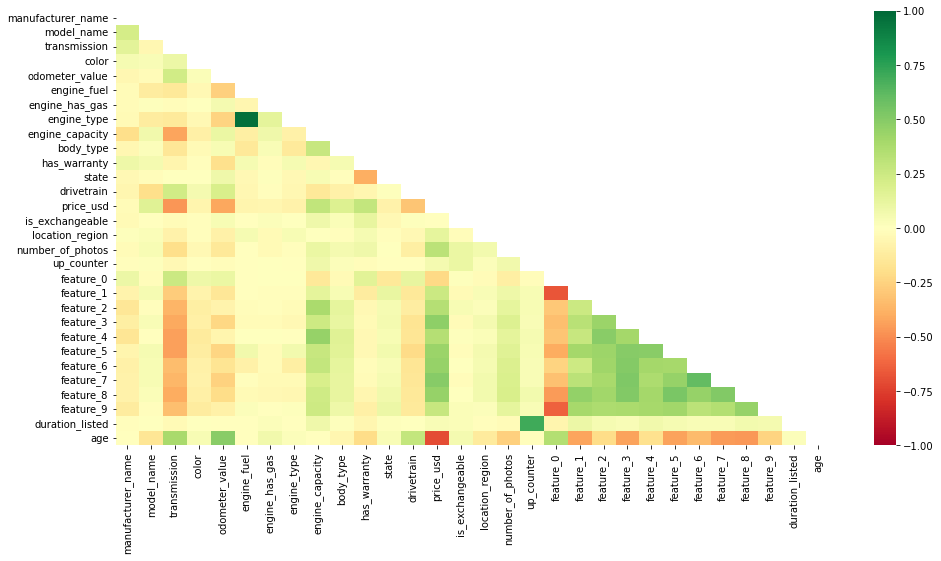

In [16]:
# Correlation matrix
corr = cars_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Visualize the matrix
plt.figure(figsize=(16,8))


sns.heatmap(corr, cmap="RdYlGn", annot=False, mask=mask, vmin=-1, vmax=1)
plt.show()

**Observation**

The correlation matrix above includes a lot of columns and it is difficult to comprehend, therefore, the columns with low correlation with `price` will be filtered out in the next section.

### Filtering the correlation matrix

In [17]:
low_corr_features  = [col for col in corr.index if abs(corr["price_usd"][col]) < 0.1 ]
low_corr_features


['manufacturer_name',
 'color',
 'engine_fuel',
 'engine_has_gas',
 'engine_type',
 'state',
 'is_exchangeable',
 'up_counter',
 'duration_listed']

In [18]:
high_corr_features  = [col for col in corr.index if abs(corr["price_usd"][col]) > 0.6 ]
high_corr_features

['price_usd', 'age']

From the correlation matrix above we observer that "Year Produced" or `age` has highest correlation with the Price of the car.

Additionally, we observe that the following columns have a very low correlation:
- `manufacturer_name`
- `color`
- `engine_fuel`
- `engine_has_gas`
- `engine_type`
- `state`
- `is_exchangeable`
- `up_counter`
- `duration_listed`

Therefore, they will be dropped 

In [19]:
cars_df.drop(columns = low_corr_features,inplace = True)

cars_df.columns

Index(['model_name', 'transmission', 'odometer_value', 'engine_capacity',
       'body_type', 'has_warranty', 'drivetrain', 'price_usd',
       'location_region', 'number_of_photos', 'feature_0', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'feature_9', 'age'],
      dtype='object')

### Important columns

We observe that the column `age` has the highest correlation with the `price_usd` column, additionally the following columns have - to some degree - an effect on the price of the car given that their correlation values isn't very low.

**Checking the correlation matrix again after dropping the columns**



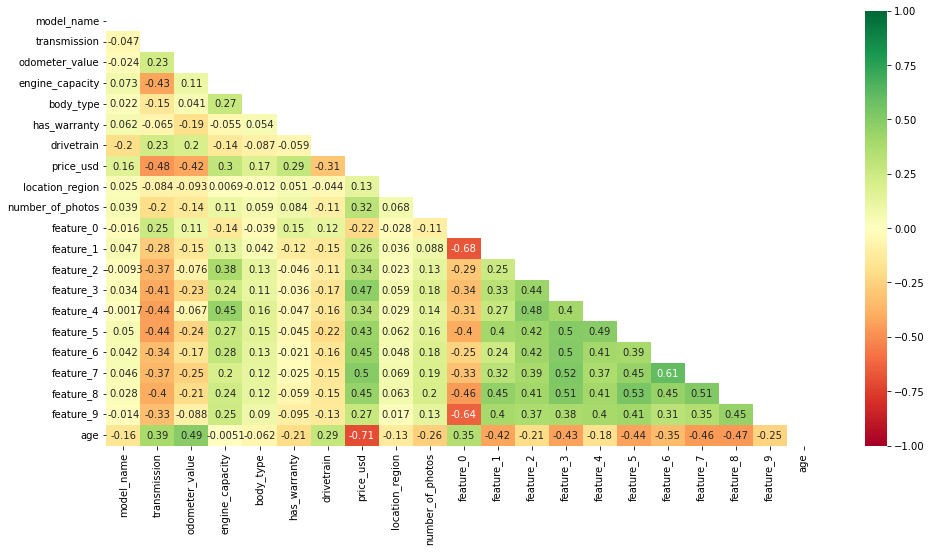

In [20]:
# Correlation matrix
corr = cars_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Visualize the matrix
plt.figure(figsize=(16,8))


sns.heatmap(corr, cmap="RdYlGn", annot=True, mask=mask, vmin=-1, vmax=1)
plt.show()

## Normalize the data to a uniform scale

In regression, it is often recommended to scale the features so that the predictors have a mean of 0. [Reference](https://www.atoti.io/when-to-perform-a-feature-scaling/)

Therefore, the following section normalizes the dataset to a mean of 0 ($\mu = 0$), and standard deviation of 1 ($\sigma = 1$).



In [21]:
# Standard Scaler

scaler = StandardScaler()

scaled_cars_df = scaler.fit_transform(cars_df)

scaled_cars_df = pd.DataFrame(data = scaled_cars_df, columns=cars_df.columns)

scaled_cars_df

,model_name,transmission,odometer_value,engine_capacity,body_type,has_warranty,drivetrain,price_usd,location_region,number_of_photos,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,age
0,0.597314,-1.410285,-0.432979,0.662782,1.096064,-0.108598,-1.890517,0.663465,0.508337,-0.106366,...,0.804345,1.862331,1.620868,-0.564189,1.345099,-0.454002,1.671653,1.186725,0.852151,-0.875318
1,0.597314,-1.410285,0.302004,1.407751,1.096064,-0.108598,-1.890517,-0.254806,0.508337,0.386020,...,0.804345,-0.536962,-0.616953,1.772455,1.345099,-0.454002,-0.598210,-0.842656,0.852151,0.116665
2,-0.149960,-1.410285,1.125184,0.662782,0.754660,-0.108598,-1.890517,-0.597213,0.508337,-0.927009,...,0.804345,-0.536962,-0.616953,-0.564189,-0.743440,-0.454002,-0.598210,1.186725,0.852151,0.240663
3,0.125674,0.709076,-1.755946,1.407751,0.413255,-0.108598,-1.890517,0.523234,0.508337,-0.106366,...,-1.243248,-0.536962,-0.616953,-0.564189,-0.743440,-0.454002,-0.598210,-0.842656,-1.173502,0.488659
4,0.294117,-1.410285,0.228505,0.662782,1.096064,-0.108598,-1.890517,-0.700851,-0.938511,0.714278,...,0.804345,-0.536962,1.620868,1.772455,-0.743440,-0.454002,-0.598210,-0.842656,0.852151,0.240663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38516,-1.476063,-1.410285,0.302004,2.152720,0.413255,-0.108598,-0.000442,-0.604995,0.508337,-0.762880,...,0.804345,-0.536962,-0.616953,1.772455,1.345099,-0.454002,-0.598210,1.186725,0.852151,0.364661
38517,0.603439,0.709076,0.529848,0.215801,-1.635171,-0.108598,-0.000442,-0.285934,-2.385358,-0.927009,...,0.804345,-0.536962,-0.616953,1.772455,1.345099,-0.454002,-0.598210,1.186725,0.852151,-0.131331
38518,-1.476063,-1.410285,3.888400,2.152720,0.413255,-0.108598,-0.000442,-0.363754,0.508337,-1.091138,...,0.804345,-0.536962,-0.616953,1.772455,1.345099,-0.454002,-0.598210,1.186725,0.852151,0.364661
38519,0.603439,0.709076,-1.682448,-0.082187,-0.269554,-0.108598,-0.000442,-0.410446,-2.385358,-0.434623,...,0.804345,-0.536962,-0.616953,-0.564189,-0.743440,-0.454002,-0.598210,-0.842656,0.852151,0.240663


In [22]:
scaled_cars_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
model_name,38521.0,-1.455501e-14,1.000013,-1.739446,-0.979923,0.033796,0.811695,1.675347
transmission,38521.0,-1.330504e-14,1.000013,-1.410285,-1.410285,0.709076,0.709076,0.709076
odometer_value,38521.0,-1.059241e-15,1.000013,-1.829445,-0.668173,0.008011,0.559247,5.520377
engine_capacity,38521.0,-7.813202e-15,1.000013,-2.764075,-0.678162,-0.082187,0.364795,8.857440
body_type,38521.0,-1.685937e-14,1.000013,-2.317980,-0.610958,0.413255,0.754660,1.437468
has_warranty,38521.0,2.676840e-14,1.000013,-0.108598,-0.108598,-0.108598,-0.108598,9.208305
drivetrain,38521.0,1.458738e-14,1.000013,-1.890517,-0.000442,-0.000442,-0.000442,1.889633
price_usd,38521.0,-3.822544e-15,1.000013,-1.032847,-0.706160,-0.285934,0.359968,6.748959
location_region,38521.0,6.924663e-15,1.000013,-2.385358,-0.215087,0.508337,0.508337,1.231760
number_of_photos,38521.0,4.513349e-15,1.000013,-1.419395,-0.762880,-0.270494,0.386020,12.531542


## Splitting the data

The data will be splitted into a 75:25 (training:testing) split

In [23]:
# Keeping the predictors in a seperate dataframe
predictors = scaled_cars_df.drop("price_usd",axis=1)

# Keeping the target in a pandas series
target = scaled_cars_df["price_usd"]

# Splitting the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target,
                                                    test_size = 0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(28890, 20)
(9631, 20)
(28890,)
(9631,)


## Predicting the price


### Linear Regression 


In [24]:
lr_model = LinearRegression().fit(X_train,Y_train)


y_pred = lr_model.predict(X_test)

rmse = mean_squared_error(Y_test,y_pred, squared = False)

score = lr_model.score(X_test, Y_test)



print(f"RMSE = {rmse}")
print(f"Score = {score*100}")


RMSE = 0.5797587667980796
Score = 67.74241822704845


**Observation**

The linear model scored 67% which isn't a high accuracy. This could suggest that the regression line is nonlinear, and therefore requires the implementation of a nonlinear regressor to fit.
So, the following cell illustrates the application of RandomForestRegressor to fit the data and present the results

### Nonlinear Regression 


In [25]:
rf_model = RandomForestRegressor().fit(X_train,Y_train)


y_pred = rf_model.predict(X_test)

rmse = mean_squared_error(Y_test,y_pred, squared = False)

score = rf_model.score(X_test, Y_test)



print(f"RMSE = {rmse}")
print(f"Score = {score*100}")

RMSE = 0.33076553607047593
Score = 89.50028134328178


**Observation**

The score of 89.5% shown above is substantially higher than the score calculated for the linear regression model.


## Conclusion

The dataset has been explored and cleansed, then fitted with two different regression models (linear and nonlinear) and the results shows that the nonlinear regression model provides a higher accuracy of prediction compared to the linear regression model.

However, the prediction accuracy could have been improved if the dataset used consisted of an evenly distributed prices along various makes and models of cars and this will avoid having a biased model.
